In [1]:
import sys
# !conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/adamcarriker/opt/anaconda3/envs/MachineLearning

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       hb1e8313_2         398 KB
    cycler-0.10.0              |   py39hecd8cb5_0          16 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.10.4            |       ha233b18_0         564 KB
    kiwisolver-1.3.1           |   py39h23ab428_0          53 KB
    lcms2-2.12                 |       hf1fd2bf_0         284 KB
    lz4-c-1.9.3                |       h23ab428_1         140 KB
    matplotlib-3.4.2           |   py39hecd8cb5

In [2]:
# open csv, save data into vectors
import csv
import numpy as np
with open('q2.csv', newline="") as csvfile:
    filereader = csv.reader(csvfile, delimiter=',')
    data = []
    headers = next(filereader)
    for row in filereader:
        data.append(np.array(row,dtype='int'))

In [3]:
# (a) calculate the value of g(x) for each data point
theta = np.array([0.05,-3.0, 2.5])
theta = np.transpose(theta)
theta_naut = 0.3

gx=[]
for d in data:
    gx.append(theta @ d[0:3] + theta_naut)

y0=[]
y1=[]
for i in range(0,len(gx)):
    if data[i][3] == 0:
        y0.append(gx[i])
    else:
        y1.append(gx[i])

# threshold value of 0.7<gx<1.1 would minimize misclassification
print('A threshold value of 0.7<gx<1.1 would minimize misclassification, as these are the largest'\
     ' and smallest values of the Y=0 and Y=1 labels, respectivley.')
threshold = 1
TP = sum(map(lambda i : y1[i] >= threshold, range(0,len(y1)) ))
FN = sum(map(lambda i : y1[i] < threshold, range(0,len(y1)) ))
TN = sum(map(lambda i : y0[i] < threshold, range(0,len(y1)) ))
FP = sum(map(lambda i : y0[i] >= threshold, range(0,len(y1)) ))
print('TP: ', TP)
print('FN: ', FN)
print('TN: ', TN)
print('FP: ', FP)    
        


A threshold value of 0.7<gx<1.1 would minimize misclassification, as these are the largest and smallest values of the Y=0 and Y=1 labels, respectivley.
TP:  3
FN:  1
TN:  4
FP:  0


In [4]:
import math
# (b) calculate f(x) for each data point

fx=[]
for d in gx:
    fx.append((1+math.exp(-d))**(-1))

y0=[]
y1=[]
for i in range(0,len(fx)):
    if data[i][3] == 0:
        y0.append(fx[i])
    else:
        y1.append(fx[i])

# threshold value of 0.67<gx<0.75 would minimize misclassification
print('A threshold value of 0.67<gx<0.75 would minimize misclassification, as these are the largest'\
     ' and smallest values of the Y=0 and Y=1 labels, respectivley.')
threshold = 0.7
        

# Compute the confusion matrix, precision, recall, and F1 score for the threshold
TP = sum(map(lambda i : y1[i] >= threshold, range(0,len(y1)) ))
FN = sum(map(lambda i : y1[i] < threshold, range(0,len(y1)) ))
TN = sum(map(lambda i : y0[i] < threshold, range(0,len(y1)) ))
FP = sum(map(lambda i : y0[i] >= threshold, range(0,len(y1)) ))

print(f'Confusion matrix:\n\t|Y=+1\t|Y=-1\t|\nY=+1\t|{TP}\t|{FP}\t|\nY=-1\t|{FN}\t|{TN}\t|')
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1score = 2* (precision * recall)/(precision + recall)
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1score: {f1score}')

A threshold value of 0.67<gx<0.75 would minimize misclassification, as these are the largest and smallest values of the Y=0 and Y=1 labels, respectivley.
Confusion matrix:
	|Y=+1	|Y=-1	|
Y=+1	|3	|0	|
Y=-1	|1	|4	|
precision: 1.0
recall: 0.75
f1score: 0.8571428571428571


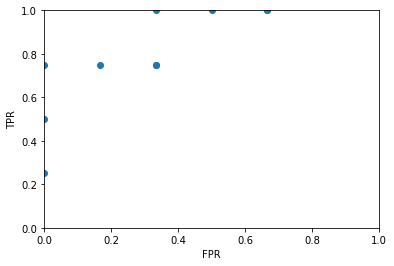

AUC= 0.9166666666666666


In [41]:
# (c) plot the ROC curve, and compute the AUC

import matplotlib.pyplot as plt

tprs = []
fprs = []
for threshold in fx:
    TP = sum(map(lambda i : y1[i] >= threshold, range(0,len(y1)) ))
    FP = sum(map(lambda i : y0[i] >= threshold, range(0,len(y1)) ))
    tpr = TP / len(y1) # number of positives classified as positives / number of positives
    fpr = FP / len(y0) # negatives classified as positives / number of negatives
    tprs.append(tpr)
    fprs.append(fpr)

plt.scatter(fprs, tprs)
plt.axis([0, 1, 0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# compute AUC
z = np.sort(np.array([tprs,fprs]))
prevtpr = 0
prevfpr = 0
auc = 0
for i in range(len(z[0])):
    auc += (z[1][i]-prevfpr) * ((z[0][i]-prevtpr)/2 + prevtpr)
    prevfpr = z[1][i]
    prevtpr = z[0][i]

auc += (1-prevfpr) * ((1-prevtpr)/2+ prevtpr)
print('AUC=',auc)

